In [1]:
fn_FB='/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/elg_one_bri/parallel_run/brick_run_scheduler/FailedBricks.txt'
fn_PB='/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/elg_one_bri/parallel_run/brick_run_scheduler/ProcessedBricks.txt'
fn_UFB='/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/elg_one_bri/parallel_run/brick_run_scheduler/UnfinishedBricks.txt'

In [2]:
import numpy as np
FB = np.loadtxt(fn_FB,dtype=np.str).transpose()[0]
PB = np.loadtxt(fn_PB,dtype=np.str).transpose()
UFB = np.loadtxt(fn_UFB,dtype=np.str).transpose()

In [3]:
import astropy.io.fits as fits
topdir_surveybricks = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/eboss_elg/survey_bricks/'
surveybricks = fits.open(topdir_surveybricks+'survey_bricks_eBoss.fits')[1].data

In [4]:
def brick_selection(type_brick):
    bricklist = []
    for brickname in type_brick:
        SEL = (surveybricks['BRICKNAME']==brickname)
        bricklist.append([surveybricks[SEL]['RA'][0],surveybricks[SEL]['DEC'][0]])
    return bricklist

In [5]:
UFB_list = np.array(brick_selection(UFB)).transpose()
PB_list = np.array(brick_selection(PB)).transpose()
FB_list = np.array(brick_selection(FB)).transpose()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(UFB_list[0],UFB_list[1],'r,',label = 'Unfinished')
plt.plot(PB_list[0],PB_list[1],'b,', label = 'Finished')
plt.plot(FB_list[0],FB_list[1],'g,',label = 'Bigblobs')
plt.xlabel('ra')
plt.ylabel('dec')
plt.legend()
plt.gca().set_xlim((0,55))

In [8]:
todir_randombricks = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/eboss_elg/sgc_brick_dat/'
plt.clf()
def random_brick_selection(type_brick,ctype, labeln):
    lable_flag = True
    for brickname in type_brick:
        hdu = fits.open(todir_randombricks+'brick_'+str(brickname)+'.fits')
        dat = hdu[1].data
        hdu.close()
        if lable_flag:
            plt.plot(dat['ra'],dat['dec'], ctype, label=labeln)
            lable_flag = False
        else:
            plt.plot(dat['ra'],dat['dec'], ctype)

<Figure size 432x288 with 0 Axes>

error: [Errno 24] Too many open files

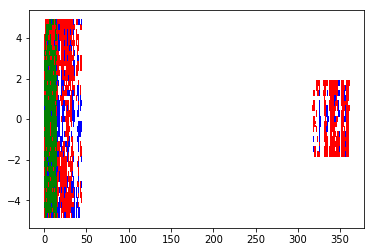

In [9]:
plt.clf()
random_brick_selection(PB, 'r,', 'Finished')
random_brick_selection(UFB, 'b,', 'UnFinished')
random_brick_selection(FB, 'g,', 'Bigblobs')
plt.legend()

In [10]:
hdu = fits.open(todir_randombricks+'brick_'+str(PB[0])+'.fits')[1].data

In [13]:
hdu['id']

array([ 4190952,  4191992,  4207379,  4226220,  4243655,  4244898,
        4272916,  4276848,  4279664,  4337926,  4338556,  4339084,
        4339279,  4347712,  4349513,  4352976,  4359916,  4364062,
        4370127,  4371546,  4372197,  4376416,  4377096,  4382854,
        4393576,  4396105,  4400038,  4400879,  4402873,  4405623,
        4410842,  4430575,  4441964,  4445424,  4445458,  4449299,
        4472090,  4473744,  4474410,  4477389,  4479590,  4487234,
        4497141,  4499358,  4505939,  4510632,  4511227,  4513384,
        4513553,  4514972,  4534074,  4543227,  4549996,  4556419,
        4558120,  4561339,  4577474,  4581755,  4581875,  4583707,
        4595129,  4598625,  4600813,  4600969,  4611798,  4618783,
        4627748,  4627811,  4651126,  4666231,  4670030,  4673612,
        4687861,  4698012,  4702900,  4708059,  4716366,  4720944,
        4729828,  4738606,  4739379,  4739966,  4743961,  4760734,
        4768999,  4781903,  4786334,  4787691,  4817606,  4818